In [4]:
import numpy as np
import int2d
import numpy.matlib as mlb


import matplotlib.pyplot as plb
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
f = lambda x,y: 1./(1+5*(x**2+y**2))
#f = lambda x,y: (1./(1+(x**2)))*(1./(1+(y**2)))

In [3]:
def _pdpts(n):
    xyrange = np.array([-1,1,-1,1])
    zn = (xyrange[0]+xyrange[1]+(xyrange[1]-xyrange[0])*
                        np.cos(np.linspace(0,1,n+1)*np.pi))/2
    zn1 = (xyrange[2]+xyrange[3]+(xyrange[3]-xyrange[2])*
                        np.cos(np.linspace(0,1,n+2)*np.pi))/2

    Pad1, Pad2 = np.meshgrid(zn,zn1)
    
    f1 = np.linspace(0,n,n+1)
    f2 = np.linspace(0,n+1,n+2)
    
    M1, M2 = np.meshgrid(f1,f2)
    h = np.array(np.mod(M1+M2,2))
    g = np.array(np.concatenate(h.T))
    
    findM = np.argwhere(g)
    
    Pad_x = np.concatenate(Pad1.T)[findM]
    Pad_y = np.concatenate(Pad2.T)[findM]
    #Pad_x = np.matrix(Pad_x)
    #Pad_y = np.matrix(Pad_y)
    
    return Pad_x.reshape(-1), Pad_y.reshape(-1)

In [5]:
def equisp_unisolv(n):
    xyrange = np.array([-1,1,-1,1])
    zn  = np.linspace(xyrange[0],xyrange[1],n+1)[::-1]
    zn1 = np.linspace(xyrange[2],xyrange[3],n+2)[::-1]

    X, Y = np.meshgrid(zn,zn1)
    
    f1 = np.linspace(0,n,n+1)
    f2 = np.linspace(0,n+1,n+2)
  
    M1, M2 = np.meshgrid(f1,f2)
    h = np.array(np.mod(M1+M2,2))
    g = np.array(np.concatenate(h.T))
    
    findM = np.argwhere(g)
    
    x = np.concatenate(X.T)[findM]
    y = np.concatenate(Y.T)[findM]
    return x.reshape(-1), y.reshape(-1)

In [6]:
def S(x,y):
    xyrange = np.array([-1,1,-1,1])
    # riporto a [0,1]
    xn = (x+1)/2
    yn = (y+1)/2
    X = (xyrange[0]+xyrange[1]+(xyrange[1]-xyrange[0])*
                        -1*np.cos(xn*np.pi))/2
    Y = (xyrange[2]+xyrange[3]+(xyrange[3]-xyrange[2])*
                        -1*np.cos(yn*np.pi))/2
    return X.reshape(-1), Y.reshape(-1)

In [7]:
def run_all(N):
    pdx, pdy = _pdpts(N)
    x, y  = equisp_unisolv(N)
    x_f, y_f = S(x,y)
    
    n_eval = N+10
    X, Y = np.meshgrid(np.linspace(-1,1,n_eval),np.linspace(-1,1, n_eval))
    X, Y = X.flatten(), Y.flatten()
    f_true = f(X,Y).reshape(-1,1)
    
    X_f, Y_f = S(X,Y)
    
    _, f_eq = int2d._wamfit(N, np.array([x, y]).T, np.array([X,Y]).T, f(x,y).reshape(-1,1))
    err_eq = np.linalg.norm(f_eq.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval
    
    _, f_fake = int2d._wamfit(N, np.array([x_f, y_f]).T, np.array([X_f,Y_f]).T, f(x,y).reshape(-1,1))
    err_fake = np.linalg.norm(f_fake.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval
    
    _, f_PD = int2d._wamfit(N, np.array([pdx, pdy]).T, np.array([X,Y]).T, f(pdx,pdy).reshape(-1,1))
    err_PD = np.linalg.norm(f_PD.reshape(n_eval,-1) - f_true.reshape(n_eval,-1))**2/n_eval
    #err_PD = np.max(np.abs(f_PD - f_true))
    
    return err_eq, err_PD, err_fake

In [8]:
Nrange = list(range(5,31))
Eq, PD, Fake = [], [], []

for n in Nrange:
    if n%5==0: print(n)
    eq, pd, fake = run_all(n)
    Eq.append(eq)
    PD.append(pd)
    Fake.append(fake)

5


10


15


20


25


30


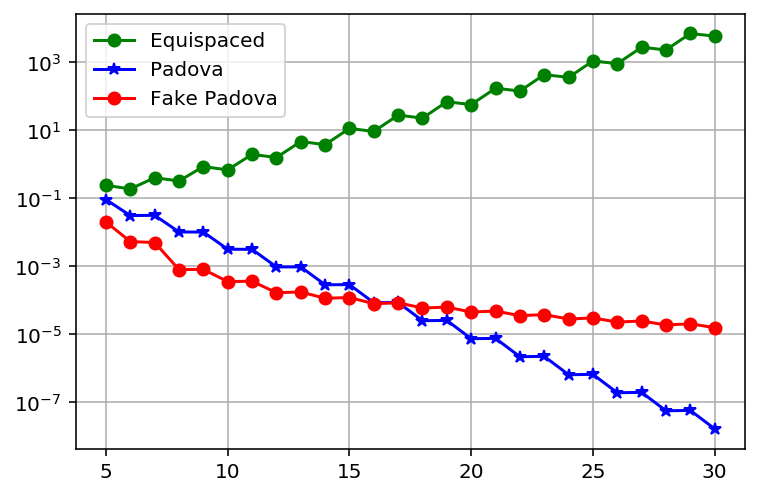

In [9]:
plt.semilogy(Nrange, Eq, '-og')
plt.semilogy(Nrange, PD, '-*b')
plt.semilogy(Nrange, Fake, '-or')
plt.legend(['Equispaced','Padova','Fake Padova'])
plt.grid()